In [8]:
# Importamos las paqueterías
import pandas as pd 
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [3]:
# Obtenemos la ruta de la base llamada "lineal_horm.xlsx"
t = pd.read_excel("/Users/igabo/Desktop/Tarea 1 semi/Tarea 1/lineal_horm.xlsx")

In [7]:
errores_est = []
i = 1

while i <= 1000:
    # Seleccionamos al azar 10 datos por cada lote (A, B y C) 
    #Lote A
    k_A = t.loc[t['lote'] == 'A'].sample(n=10, replace = True)
    #Lote B
    k_B = t.loc[t['lote'] == 'B'].sample(n=10, replace = True)
    #Lote C 
    k_C = t.loc[t['lote'] == 'C'].sample(n=10, replace = True)

    # Juntamos los 3 dataframe's en uno solo
    T = k_A.append(k_B).append(k_C)

    # Seleccionamos la variable explicativa y de respuesta
    x = T[["horas"]]
    y = T[["monto"]]

    # Aplicamos la regresión 
    reg = linear_model.LinearRegression()
    reg.fit(x, y)

    # Calculamos la Y estimada
    y_pred = reg.predict(x)
    y_estim = y_pred.reshape(-1)

    # Reacomodamos los valores de X y de Y 
    x = x.to_numpy().reshape(-1)
    y_real = y.to_numpy().reshape(-1)

    # Calculamos los residuales
    residual = y_real - y_estim

    # Y finalmente el error estándar 
    den = sum((x - np.mean(x))**2)
    num = sum(residual**2)/(30-2)
    err = np.sqrt(num / den)

    errores_est.append(err)
    i += 1

errores_est

[0.004779972530716438,
 0.0057817956474457395,
 0.0040699080541089045,
 0.003354696026290176,
 0.0037686299873574726,
 0.004041779201176034,
 0.002666933795307305,
 0.003981460455220004,
 0.00435380038315891,
 0.0026192490085043046,
 0.003424013498969689,
 0.003131200225041222,
 0.0030270293629777374,
 0.0038439168067801056,
 0.0037106980438056693,
 0.0035885063700370726,
 0.004328429215901282,
 0.0038001552536298263,
 0.0037752476484692057,
 0.004882409815482317,
 0.0045798480970074594,
 0.004096504660359353,
 0.003873298603568619,
 0.004076013959643894,
 0.00356289485089902,
 0.003858484225900713,
 0.005640062096877033,
 0.0030046400333914583,
 0.00476848984711875,
 0.004464453067250539,
 0.0027185518567849768,
 0.004233189645976954,
 0.004061766400870963,
 0.004394782705575875,
 0.004476325382062942,
 0.003171362478900549,
 0.004782975579607286,
 0.006051006948498125,
 0.005644635698215331,
 0.005114019021156026,
 0.004327781190106924,
 0.0038081156807119217,
 0.00409794255149097,
 

(array([  6.,   5.,  18.,  62.,  83., 126., 165., 154., 124.,  83.,  60.,
         35.,  32.,  19.,  11.,   2.,   2.,   9.,   1.,   3.]),
 array([0.00228603, 0.00254576, 0.00280549, 0.00306522, 0.00332495,
        0.00358468, 0.00384441, 0.00410414, 0.00436387, 0.0046236 ,
        0.00488333, 0.00514306, 0.0054028 , 0.00566253, 0.00592226,
        0.00618199, 0.00644172, 0.00670145, 0.00696118, 0.00722091,
        0.00748064]),
 <BarContainer object of 20 artists>)

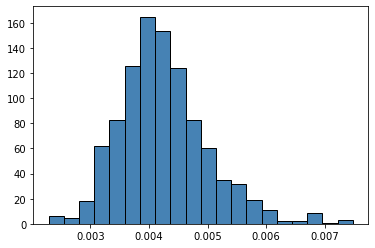

In [14]:
plt.hist(errores_est, 20, color = "steelblue", ec = "black")